## Plots for DEM simulation report
Avilable on github and website

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
from matplotlib.lines import Line2D
import colorsys
from matplotlib import colors
import readFiles

# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

def readfile(interactionFile):
    hashCounter = 0
    temp        = []
    contactList = [] # list with interaction parameters for each element at each timestep

    fileLines = interactionFile.readlines()[18:] # skipping the comment lines
    for line in fileLines:
        if line.strip() and not line.lstrip().startswith('#'):
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # takes care of # and spaces
            if hashCounter == 3: 
                contactList.append(np.array(temp))
                temp        = []
                hashCounter = 0
            
    interactionFile.close()
    return contactList

In [36]:
CSdatapath = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/miscelleneous/DEM_codes/NP_100_phi_0.5_Cundall-Strack.txt"
HMdatapth = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/miscelleneous/DEM_codes/NP_100_phi_0.5_Hertzian-Mindlin.txt"
figsavepath = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/miscelleneous/DEM_codes/"

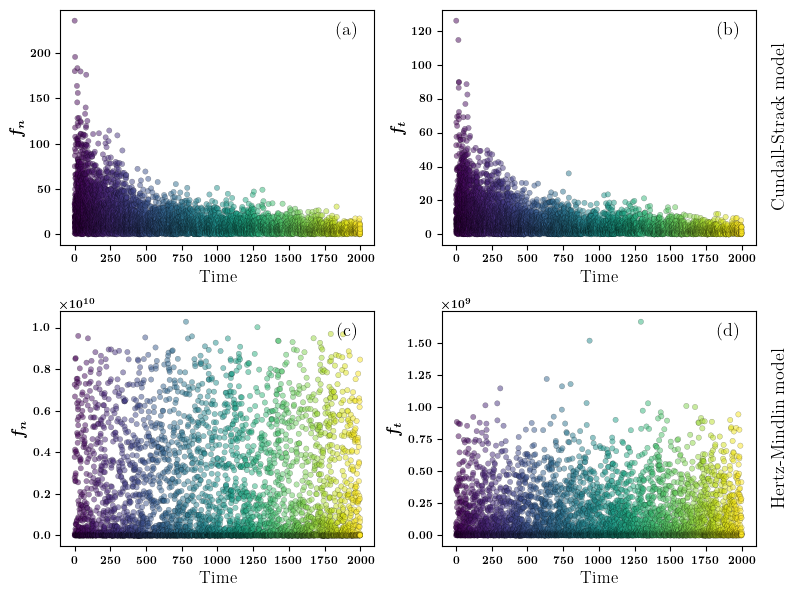

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Open and read data
CSFile = open(CSdatapath)
HMFile = open(HMdatapth)

CSintList = readfile(CSFile)
HMintList = readfile(HMFile)

params = [16, 18]

fig, ax = plt.subplots(2, 2, figsize=(8, 6))  # adjusted figure size
data_lists = [CSintList, HMintList]
label_fontsize = 12
panel_labels = ['(a)', '(b)', '(c)', '(d)']

for idx, datalist in enumerate(data_lists):
    for idy, ii in enumerate(params):
        ft = []
        tt = []
        for idz, data in enumerate(datalist):
            if data.size != 0:
                fts = np.linalg.norm(data[:, [ii, ii+1]], axis=1)
                ft.extend(fts)
                tt.extend([idz] * len(fts))
        
        ax[idx, idy].scatter(tt, ft, s=15, alpha=0.5, c=tt, cmap='viridis',
                             edgecolors='k', linewidths=0.2, marker='o')
        ax[idx, idy].set_xlabel('Time', fontsize=label_fontsize)

        # Add panel label (top-right in axes coords)
        ax[idx, idy].text(0.95, 0.95, panel_labels[2*idx + idy],
                          transform=ax[idx, idy].transAxes,
                          fontsize=13, fontweight='bold',
                          ha='right', va='top')

# Set axis labels
ax[0,0].set_ylabel(r'$f_n$', fontsize=label_fontsize)
ax[0,1].set_ylabel(r'$f_t$', fontsize=label_fontsize)
ax[1,0].set_ylabel(r'$f_n$', fontsize=label_fontsize)
ax[1,1].set_ylabel(r'$f_t$', fontsize=label_fontsize)

# Vertical text on rightmost column
text_fontsize = 13
ax[0,1].text(1.05, 0.5, 'Cundall-Strack model', rotation=90,
             transform=ax[0,1].transAxes, va='center', ha='left',
             fontsize=text_fontsize)
ax[1,1].text(1.05, 0.5, 'Hertz-Mindlin model', rotation=90,
             transform=ax[1,1].transAxes, va='center', ha='left',
             fontsize=text_fontsize)

plt.tight_layout()
plt.savefig(figsavepath + 'forces.pdf', dpi=300, bbox_inches='tight')
plt.show()

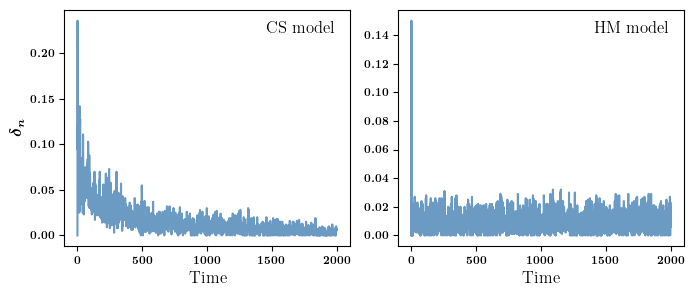

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Open and read data
CSFile = open(CSdatapath)
HMFile = open(HMdatapth)

CSintList = readfile(CSFile)
HMintList = readfile(HMFile)

fig, ax = plt.subplots(1, 2, figsize=(7, 3))  # adjusted figure size
data_lists = [CSintList, HMintList]
model_labels = ['CS model', 'HM model']
label_fontsize = 12

for idx, datalist in enumerate(data_lists):
    data1 = []
    for idz, data in enumerate(datalist):
        if data.size != 0:
            overlaps = np.max(data[:, 20])
            data1.append(overlaps)
        else:
            data1.append(0)

    ax[idx].plot(data1, color='steelblue', linewidth=1.5, alpha=0.8)
    ax[idx].set_xlabel('Time', fontsize=label_fontsize)
    #ax[idx].grid(True, linestyle='--', alpha=0.4)

    # Add subplot label
    ax[idx].text(0.95, 0.95, model_labels[idx], transform=ax[idx].transAxes,
                 ha='right', va='top', fontsize=12, fontweight='bold')

# Set y-label only on the first subplot
ax[0].set_ylabel(r'$\delta_n$', fontsize=label_fontsize)

plt.tight_layout()
plt.savefig(figsavepath + 'overlap.pdf', dpi=300, bbox_inches='tight')
plt.show()

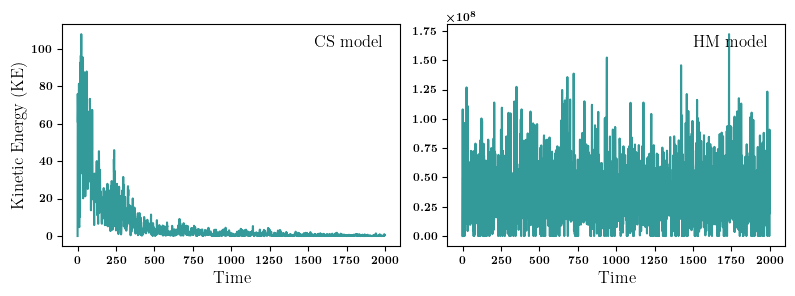

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Open and read data
CSFile = open(CSdatapath)
HMFile = open(HMdatapth)

CSintList = readfile(CSFile)
HMintList = readfile(HMFile)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))  # wider layout
data_lists = [CSintList, HMintList]
model_labels = ['CS model', 'HM model']
label_fontsize = 12

for idx, datalist in enumerate(data_lists):
    data1 = []
    for idz, data in enumerate(datalist):
        if data.size != 0:
            KE1 = 0.5 * np.sum(np.linalg.norm(data[:, [12, 13]], axis=1)**2)  # KE of p1
            KE2 = 0.5 * np.sum(np.linalg.norm(data[:, [14, 15]], axis=1)**2)  # KE of p2
            KE = KE1 + KE2
            data1.append(KE)
        else:
            data1.append(0)

    ax[idx].plot(data1, color='teal', linewidth=1.5, alpha=0.8)
    ax[idx].set_xlabel('Time', fontsize=label_fontsize)
    #ax[idx].grid(True, linestyle='--', alpha=0.4)

    # Annotate top-right with model label
    ax[idx].text(0.95, 0.95, model_labels[idx],
                 transform=ax[idx].transAxes,
                 ha='right', va='top',
                 fontsize=12, fontweight='bold')

# Shared y-axis label
ax[0].set_ylabel('Kinetic Energy (KE)', fontsize=label_fontsize)

plt.tight_layout()
plt.savefig(figsavepath + 'KE.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
filepath = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/miscelleneous/DEM_codes/NP_100_phi_0.5_Cundall-Strack.txt'
interactionFile = open(filepath)

intList = readfile(interactionFile)

In [60]:
len(intList)

2000

In [65]:
intList[1].shape

(8, 23)

In [81]:
ft = []
tt = []
for idx, data in enumerate(intList):
    if data.size != 0:
        fts = np.linalg.norm(data[:, [14, 15]], axis=1)
        ft.extend(fts)
        
        tt.extend([idx]*len(fts))

In [83]:
len(tt)

7209

In [84]:
len(ft)

7209

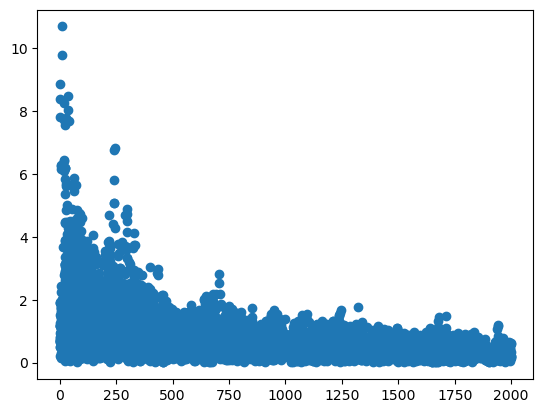

In [86]:
plt.scatter(tt, ft)
plt.show()

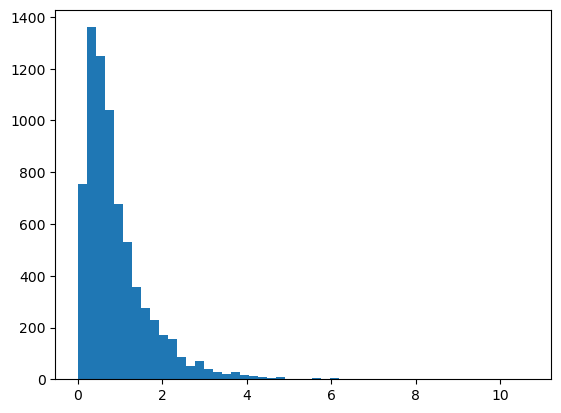

In [75]:
import matplotlib.pyplot as plt

plt.hist(ft, bins=50)  # Customize bins as needed
#plt.grid()
plt.show()


In [76]:
filepath = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/miscelleneous/DEM_codes/NP_100_phi_0.5_Hertzian-Mindlin.txt'
interactionFile = open(filepath)

intList1 = readfile(interactionFile)

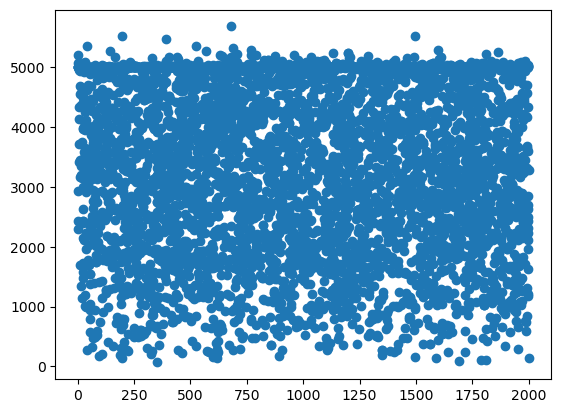

In [87]:
ft = []
tt = []
for idx, data in enumerate(intList1):
    if data.size != 0:
        fts = np.linalg.norm(data[:, [14, 15]], axis=1)
        ft.extend(fts)
        
        tt.extend([idx]*len(fts))

plt.scatter(tt, ft)
plt.show()

In [66]:
np.linalg.norm(intList[1][:, [14, 15]], axis=1)

array([0.67267972, 0.67267972, 0.94408315, 1.17029441, 0.66300679,
       1.27140906, 7.81261467, 1.16127516])